# Political Opinions with Machine Learning

## Introduction

In this notebook we will ask the machine to predict political views by describing the political orientations of the people with machine learning.

** Yunus Emre Gündoğmuş - May 2018 **

Detailed Project : [Political Opinion with Machine Learning](https://www.kaggle.com/yemregundogmus/political-opinion-with-machine-learning)

## Contents

1 - Data Information 

2 - Import Data and Libraries

3 - Data Visualition Phase 

4 - Cleaning Data

5 - Choosing the Best Model 

6 - Source

## 1- Data Information

* Let's see Features : 


* Cinsiyet : Sex Feature
* Yas : Age Feature
* Bolge : Areas inhabited in Turkey
* Egitim : Education Level 
* (Soru = Question) (Questions include Turkey)
* Soru1/Question1: Do you think our Economic Status is good?
* Soru2/Question2: Need Reform in Education?
* Soru3/Question3: Resolve Privatization Are You?
* Soru4/Question4: Should the state use a penalty like death penalty for certain crimes?
* Soru5/Question5: Do you find our journalists neutral enough?
* Soru6/Question6: From 22:00 am Then Are You Supporting the Prohibition to Buy Drinks?
* Soru7/Question7: Do You Want to Live in a Secular State?
* Soru8/Question8: Are you supporting the abortion ban?
* Soru9/Question9: Do you think that the extraordinary state (Ohal) restricts Freedoms?
* Soru10/Question10: Would you like a new part of the parliament to enter?
* Parti : Political View


* Data Review : 


* Evet = Yes 
* Hayır = No 
* Erkek = Male 
* Kadın = Female
* Yas = Age
* Bolge = City 
* Egitim = Education 
* İlkokul = primary school
* OrtaOkul = junior high school
* Lise = High School
* Lisans = University
* Lisans Üstü = MA

## 2- Import Data And Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Timestamp,Cinsiyet,Yas,Bolge,Egitim,soru1,soru2,soru3,soru4,soru5,soru6,soru7,soru8,soru9,soru10,parti
0,5/11/2018 1:26:14,Erkek,18-30,Marmara,Lisans,Hayır,Evet,Evet,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,IYI PARTI
1,5/11/2018 1:28:11,Erkek,18-30,Marmara,Lisans,Evet,Evet,Hayır,Evet,Hayır,Evet,Hayır,Evet,Hayır,Hayır,AKP
2,5/11/2018 1:28:26,Kadın,18-30,Marmara,Lisans,Hayır,Evet,Hayır,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,DIĞER
3,5/11/2018 1:30:18,Erkek,0-18,Marmara,Lise,Evet,Evet,Hayır,Evet,Hayır,Evet,Evet,Evet,Evet,Evet,IYI PARTI
4,5/11/2018 1:30:21,Erkek,18-30,Marmara,Ön Lisans,Hayır,Evet,Evet,Evet,Hayır,Hayır,Evet,Evet,Hayır,Hayır,IYI PARTI


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 16 columns):
Timestamp    168 non-null object
Cinsiyet     168 non-null object
Yas          168 non-null object
Bolge        168 non-null object
Egitim       168 non-null object
soru1        168 non-null object
soru2        168 non-null object
soru3        168 non-null object
soru4        168 non-null object
soru5        168 non-null object
soru6        168 non-null object
soru7        168 non-null object
soru8        168 non-null object
soru9        168 non-null object
soru10       168 non-null object
parti        168 non-null object
dtypes: object(16)
memory usage: 21.1+ KB


In [5]:
data.describe()

,Timestamp,Cinsiyet,Yas,Bolge,Egitim,soru1,soru2,soru3,soru4,soru5,soru6,soru7,soru8,soru9,soru10,parti
count,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168
unique,168,2,5,7,6,2,2,2,2,2,2,2,2,2,2,6
top,5/11/2018 2:13:20,Erkek,18-30,Marmara,Lisans,Hayır,Evet,Evet,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,IYI PARTI
freq,1,138,102,97,79,99,161,86,84,160,109,132,106,125,134,44


## 3- Data Visualition Phase

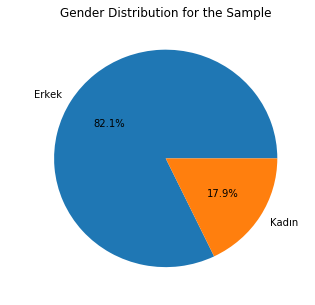

In [6]:
fig = plt.figure(figsize=(5,5))
data['Cinsiyet'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.ylabel(" ", fontsize = 15)
plt.title("Gender Distribution for the Sample")
print("")

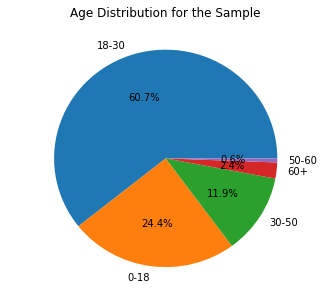

In [7]:
fig = plt.figure(figsize=(5,5))
data['Yas'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.ylabel(" ", fontsize = 15)
plt.title("Age Distribution for the Sample")
print("")

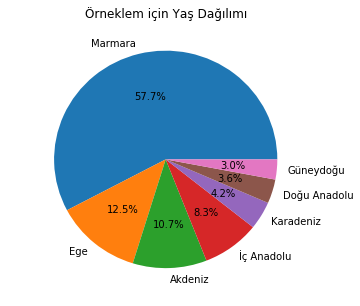

In [8]:
fig = plt.figure(figsize=(5,5))
data['Bolge'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.ylabel(" ", fontsize = 15)
plt.title("Örneklem için Yaş Dağılımı")
print("")

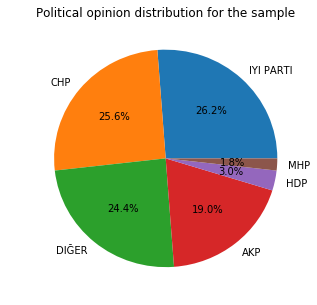

In [9]:
fig = plt.figure(figsize=(5,5))
data['parti'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.ylabel(" ", fontsize = 15)
plt.title("Political opinion distribution for the sample")
print("")

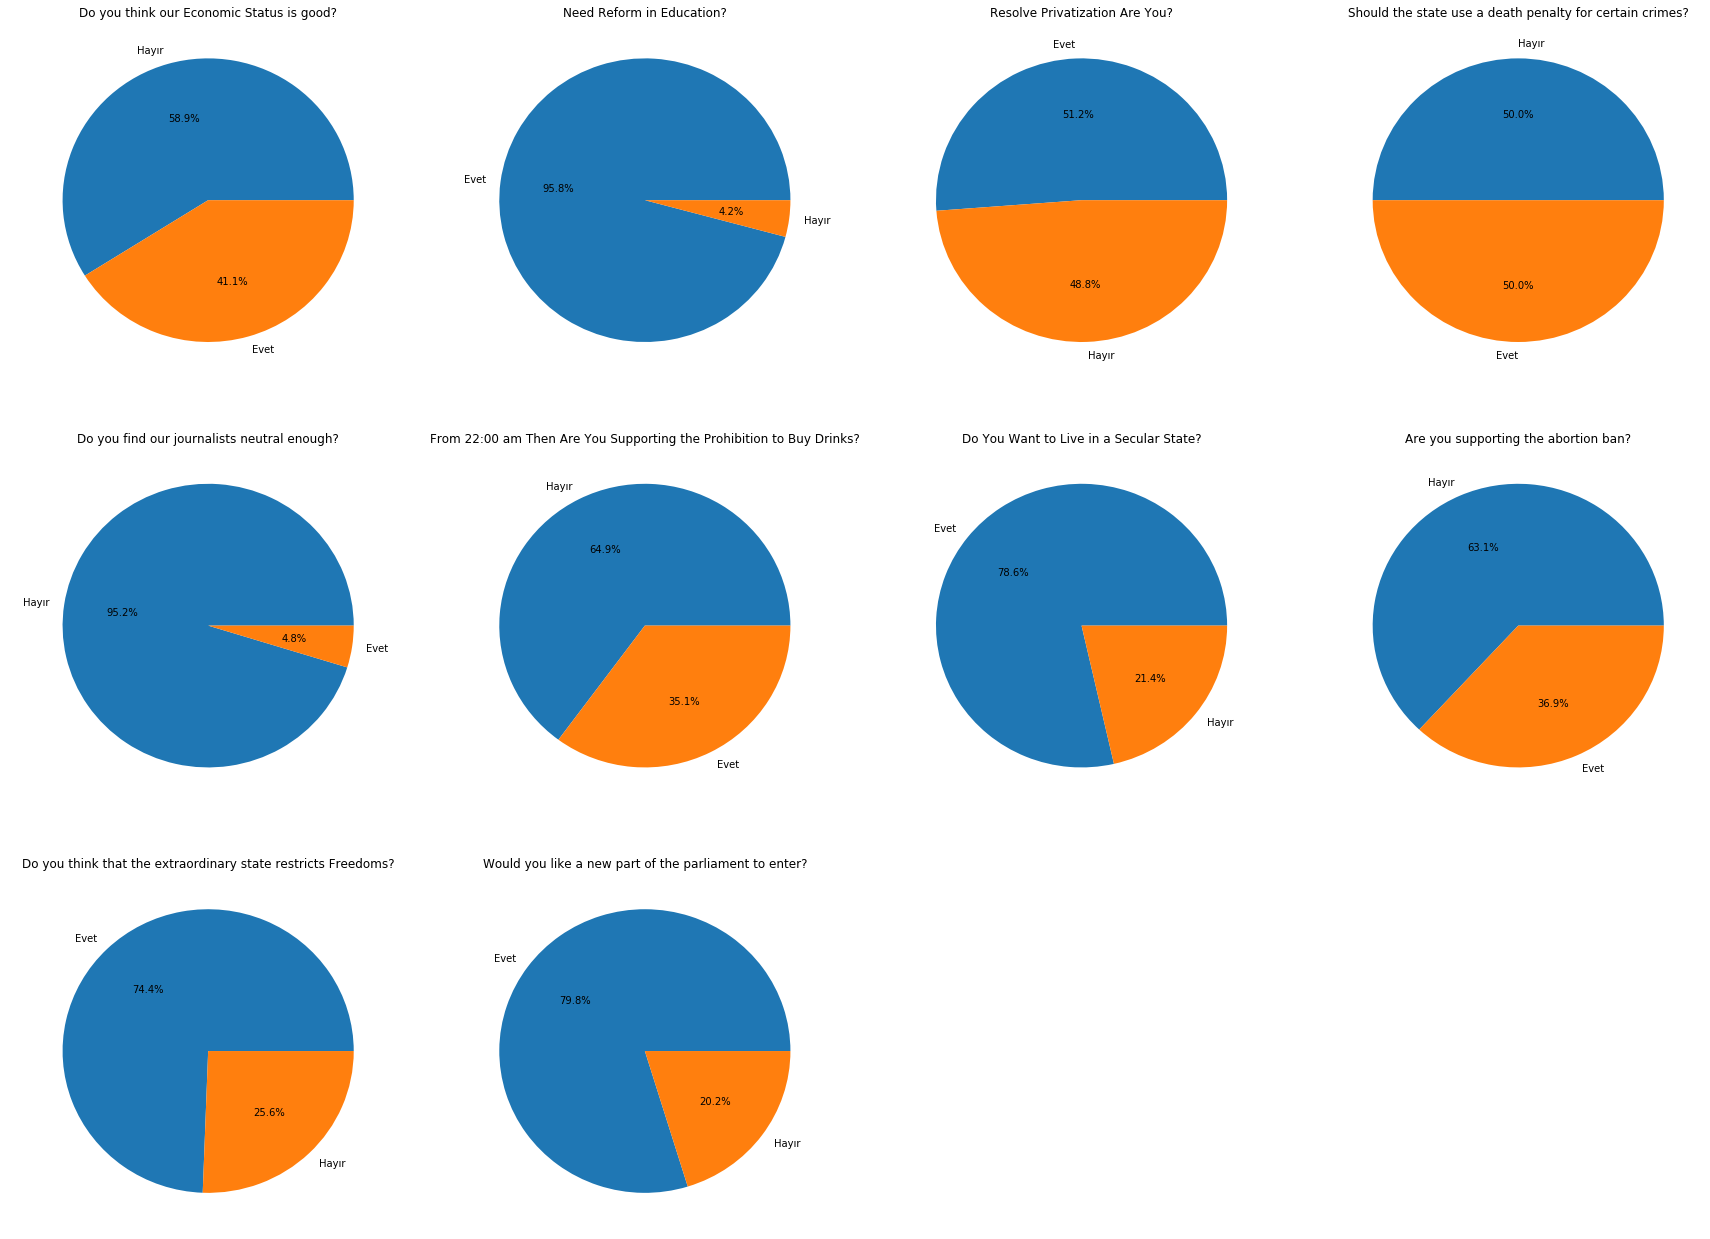

In [10]:
fig = plt.figure(figsize=(30,30))
p1 = fig.add_subplot(4,4,1)
data['soru1'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.ylabel(" ", fontsize = 15)
plt.title("Do you think our Economic Status is good?")
plt.grid()
p2 = fig.add_subplot(4,4,2)
data['soru2'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.title("Need Reform in Education?")
plt.ylabel(" ", fontsize = 15)
plt.grid()
p3 = fig.add_subplot(4,4,3)
data['soru3'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.title("Resolve Privatization Are You?")
plt.ylabel(" ", fontsize = 15)
plt.grid()
p4 = fig.add_subplot(4,4,4)
data['soru4'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.ylabel(" ", fontsize = 15)
plt.title("Should the state use a death penalty for certain crimes?")
p5 = fig.add_subplot(4,4,5)
data['soru5'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.ylabel(" ", fontsize = 15)
plt.title("Do you find our journalists neutral enough?")
plt.grid()
p6 = fig.add_subplot(4,4,6)
data['soru6'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.title("From 22:00 am Then Are You Supporting the Prohibition to Buy Drinks?")
plt.ylabel(" ", fontsize = 15)
plt.grid()
p7 = fig.add_subplot(4,4,7)
data['soru7'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.title("Do You Want to Live in a Secular State?")
plt.ylabel(" ", fontsize = 15)
plt.grid()
p8 = fig.add_subplot(4,4,8)
data['soru8'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.ylabel(" ", fontsize = 15)
plt.title("Are you supporting the abortion ban?")
p9 = fig.add_subplot(4,4,9)
data['soru9'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.title("Do you think that the extraordinary state restricts Freedoms?")
plt.ylabel(" ", fontsize = 15)
plt.grid()
p10 = fig.add_subplot(4,4,10)
data['soru10'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.ylabel(" ", fontsize = 15)
plt.title("Would you like a new part of the parliament to enter?")
print(" ")

## 4- Cleaning Data

**  First We Need Drop Some Axis, Like TimeStamp **

In [11]:
data = data.drop(['Timestamp'], axis = 1)
data.head()

,Cinsiyet,Yas,Bolge,Egitim,soru1,soru2,soru3,soru4,soru5,soru6,soru7,soru8,soru9,soru10,parti
0,Erkek,18-30,Marmara,Lisans,Hayır,Evet,Evet,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,IYI PARTI
1,Erkek,18-30,Marmara,Lisans,Evet,Evet,Hayır,Evet,Hayır,Evet,Hayır,Evet,Hayır,Hayır,AKP
2,Kadın,18-30,Marmara,Lisans,Hayır,Evet,Hayır,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,DIĞER
3,Erkek,0-18,Marmara,Lise,Evet,Evet,Hayır,Evet,Hayır,Evet,Evet,Evet,Evet,Evet,IYI PARTI
4,Erkek,18-30,Marmara,Ön Lisans,Hayır,Evet,Evet,Evet,Hayır,Hayır,Evet,Evet,Hayır,Hayır,IYI PARTI


**  Second We Mapping The Features Data **

In [12]:
combine = [data]
age_mapping = {"0-18": 1, "18-30": 2, "30-50": 3, "50-60": 4, "60+": 5}
for dataset in combine:
    dataset['Yas'] = dataset['Yas'].map(age_mapping)
    dataset['Yas'] = dataset['Yas'].fillna(0)

data.head()

,Cinsiyet,Yas,Bolge,Egitim,soru1,soru2,soru3,soru4,soru5,soru6,soru7,soru8,soru9,soru10,parti
0,Erkek,2,Marmara,Lisans,Hayır,Evet,Evet,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,IYI PARTI
1,Erkek,2,Marmara,Lisans,Evet,Evet,Hayır,Evet,Hayır,Evet,Hayır,Evet,Hayır,Hayır,AKP
2,Kadın,2,Marmara,Lisans,Hayır,Evet,Hayır,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,DIĞER
3,Erkek,1,Marmara,Lise,Evet,Evet,Hayır,Evet,Hayır,Evet,Evet,Evet,Evet,Evet,IYI PARTI
4,Erkek,2,Marmara,Ön Lisans,Hayır,Evet,Evet,Evet,Hayır,Hayır,Evet,Evet,Hayır,Hayır,IYI PARTI


In [13]:
sex_mapping = {"Erkek": 0, "Kadın": 1}
data['Cinsiyet'] = data['Cinsiyet'].map(sex_mapping)

data.head()

,Cinsiyet,Yas,Bolge,Egitim,soru1,soru2,soru3,soru4,soru5,soru6,soru7,soru8,soru9,soru10,parti
0,0,2,Marmara,Lisans,Hayır,Evet,Evet,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,IYI PARTI
1,0,2,Marmara,Lisans,Evet,Evet,Hayır,Evet,Hayır,Evet,Hayır,Evet,Hayır,Hayır,AKP
2,1,2,Marmara,Lisans,Hayır,Evet,Hayır,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,DIĞER
3,0,1,Marmara,Lise,Evet,Evet,Hayır,Evet,Hayır,Evet,Evet,Evet,Evet,Evet,IYI PARTI
4,0,2,Marmara,Ön Lisans,Hayır,Evet,Evet,Evet,Hayır,Hayır,Evet,Evet,Hayır,Hayır,IYI PARTI


In [14]:
combine = [data]
city_mapping = {"Marmara": 1, "Ege": 2, "Karadeniz": 3, "Akdeniz": 4, "İç Anadolu": 5, "Doğu Anadolu": 6, "Güneydoğu": 7}
for dataset in combine:
    dataset['Bolge'] = dataset['Bolge'].map(city_mapping)
    dataset['Bolge'] = dataset['Bolge'].fillna(0)

data.head()

,Cinsiyet,Yas,Bolge,Egitim,soru1,soru2,soru3,soru4,soru5,soru6,soru7,soru8,soru9,soru10,parti
0,0,2,1,Lisans,Hayır,Evet,Evet,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,IYI PARTI
1,0,2,1,Lisans,Evet,Evet,Hayır,Evet,Hayır,Evet,Hayır,Evet,Hayır,Hayır,AKP
2,1,2,1,Lisans,Hayır,Evet,Hayır,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,DIĞER
3,0,1,1,Lise,Evet,Evet,Hayır,Evet,Hayır,Evet,Evet,Evet,Evet,Evet,IYI PARTI
4,0,2,1,Ön Lisans,Hayır,Evet,Evet,Evet,Hayır,Hayır,Evet,Evet,Hayır,Hayır,IYI PARTI


In [15]:
combine = [data]
education_mapping = {"İlkokul": 1, "Ortaokul": 2, "Lise": 3, "Ön Lisans": 4, "Lisans": 5, "Lisans Üstü": 6}
for dataset in combine:
    dataset['Egitim'] = dataset['Egitim'].map(education_mapping)
    dataset['Egitim'] = dataset['Egitim'].fillna(0)

data.head()

,Cinsiyet,Yas,Bolge,Egitim,soru1,soru2,soru3,soru4,soru5,soru6,soru7,soru8,soru9,soru10,parti
0,0,2,1,5,Hayır,Evet,Evet,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,IYI PARTI
1,0,2,1,5,Evet,Evet,Hayır,Evet,Hayır,Evet,Hayır,Evet,Hayır,Hayır,AKP
2,1,2,1,5,Hayır,Evet,Hayır,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,DIĞER
3,0,1,1,3,Evet,Evet,Hayır,Evet,Hayır,Evet,Evet,Evet,Evet,Evet,IYI PARTI
4,0,2,1,4,Hayır,Evet,Evet,Evet,Hayır,Hayır,Evet,Evet,Hayır,Hayır,IYI PARTI


In [16]:
question_mapping = {"Evet": 1, "Hayır": 0}
data['soru1'] = data['soru1'].map(question_mapping)
data['soru2'] = data['soru2'].map(question_mapping)
data['soru3'] = data['soru3'].map(question_mapping)
data['soru4'] = data['soru4'].map(question_mapping)
data['soru5'] = data['soru5'].map(question_mapping)
data['soru6'] = data['soru6'].map(question_mapping)
data['soru7'] = data['soru7'].map(question_mapping)
data['soru8'] = data['soru8'].map(question_mapping)
data['soru9'] = data['soru9'].map(question_mapping)
data['soru10'] = data['soru10'].map(question_mapping)

data.head()

,Cinsiyet,Yas,Bolge,Egitim,soru1,soru2,soru3,soru4,soru5,soru6,soru7,soru8,soru9,soru10,parti
0,0,2,1,5,0,1,1,0,0,0,1,0,1,1,IYI PARTI
1,0,2,1,5,1,1,0,1,0,1,0,1,0,0,AKP
2,1,2,1,5,0,1,0,0,0,0,1,0,1,1,DIĞER
3,0,1,1,3,1,1,0,1,0,1,1,1,1,1,IYI PARTI
4,0,2,1,4,0,1,1,1,0,0,1,1,0,0,IYI PARTI


In [17]:
combine = [data]
opinion_mapping = {"AKP": 1, "CHP": 2, "IYI PARTI": 3, "MHP": 4, "HDP": 5, "DIĞER": 6}
for dataset in combine:
    dataset['parti'] = dataset['parti'].map(opinion_mapping)
    dataset['parti'] = dataset['parti'].fillna(0)

data.head()

,Cinsiyet,Yas,Bolge,Egitim,soru1,soru2,soru3,soru4,soru5,soru6,soru7,soru8,soru9,soru10,parti
0,0,2,1,5,0,1,1,0,0,0,1,0,1,1,3
1,0,2,1,5,1,1,0,1,0,1,0,1,0,0,1
2,1,2,1,5,0,1,0,0,0,0,1,0,1,1,6
3,0,1,1,3,1,1,0,1,0,1,1,1,1,1,3
4,0,2,1,4,0,1,1,1,0,0,1,1,0,0,3


** Now We Have Clean Data We Need To Look Correlation For Get Best Model **

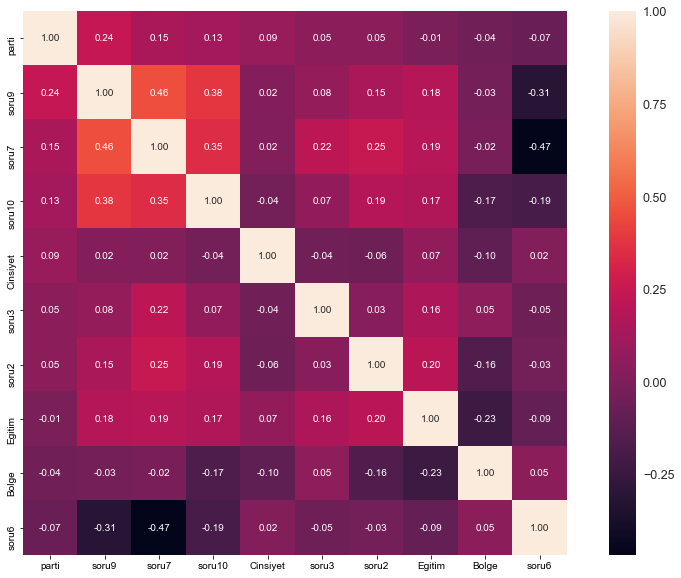

In [18]:
k = 10 #number of variables for heatmap
corrmat = data.corr()
cols = corrmat.nlargest(k, 'parti')['parti'].index
f, ax = plt.subplots(figsize=(15, 10))
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

** We dont have great corelations but I wont drop no more feature's I think the machine will make more use of the questions when making the forecast. **

## 5 - Choosing The Best Model

 My Predict Feature is** "Parti"** 

In [19]:
from sklearn.model_selection import train_test_split

predictors = data.drop(['parti'], axis=1)
target = data["parti"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.04, random_state = 0)

We use we will use ;
-  Random Forest
-  Decision Tree
-  KNeighbors 
- SVC 
- Logistic Regression	

which are known models. The reason for selecting these models is that the data is in the form of 1-0 Yes-NO 

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

71.43


In [21]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

42.86


In [22]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)
y_pred = svm.predict(x_val)
acc_svm = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svm)

71.43


In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

57.14


In [24]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

42.86


In [25]:
models = pd.DataFrame({
    'Model': ['SVC', 
              'Random Forest', 'KNeighbors', 
              'Decision Tree', 'Logistic Regression'],
    'Score': [ acc_svm, 
              acc_randomforest, acc_knn, acc_decisiontree, acc_logreg
             ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,SVC,71.43
3,Decision Tree,71.43
2,KNeighbors,57.14
1,Random Forest,42.86
4,Logistic Regression,42.86


## 6 - Source

* [Uzay00's KaVe Repository](https://github.com/uzay00/KaVe)